In [129]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
import pandas as pd
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.data import read_merged
from seminartools.data import read_inflation

# 1. Read data

In [164]:
#only european countries, excluding spain and portugal
df = read_merged(only_countries=["Italy", "Switzerland", "Germany", "Netherlands", "Norway", "Denmark", "Sweden", "France", "Belgium", "United Kingdom"]).reset_index()

#all countries
#df = read_merged().reset_index

Splits:   0%|          | 0/5 [01:09<?, ?it/s]


In [165]:
df.pivot(index="date", columns="country", values="inflation")

country,Belgium,Denmark,Germany,Netherlands,Norway,Sweden,Switzerland,United Kingdom
date,,,,,,,,
1996-04-01,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1997-04-01,NaN,NaN,NaN,NaN,NaN,NaN,-0.001095,NaN
1998-04-01,0.006954,0.008368,0.002387,0.007868,0.005162,0.003654,0.000000,0.011331
1999-01-01,0.005533,0.005502,NaN,NaN,NaN,NaN,NaN,NaN
1999-04-01,0.005502,0.010944,0.005558,0.008528,0.007344,0.006098,0.002183,0.009722
...,...,...,...,...,...,...,...,...
2022-01-01,0.033275,0.021536,0.018498,0.029173,0.007055,0.016158,0.007859,NaN
2022-04-01,0.016949,0.032997,0.028500,0.024764,0.024113,0.032686,0.015595,NaN
2022-07-01,0.025000,0.023957,0.016134,0.040519,0.022995,0.030796,0.006718,NaN


# 2. AR model per country

In [166]:
model = FourQuarterAverageModel()
model

In [167]:
from warnings import filterwarnings

filterwarnings("ignore")
model.fit(df)

# 4. H-period ahead forecasting

In [168]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df, "2020-01-01", h=1)
forecast

,date,country,inflation
0,2020-01-01,Belgium,0.001163
1,2020-01-01,Denmark,0.001706
2,2020-01-01,Germany,0.003133
3,2020-01-01,Netherlands,0.006613
4,2020-01-01,Norway,0.004006
...,...,...,...
99,2023-01-01,Netherlands,0.027058
100,2023-01-01,Norway,0.016216
101,2023-01-01,Sweden,0.027675
102,2023-01-01,Switzerland,0.007345


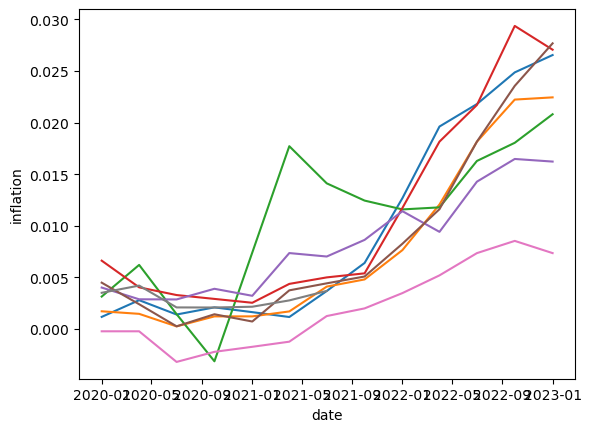

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=forecast, x="date", y="inflation", hue="country")
# turn off legend
plt.legend().remove()

In [170]:
df

,index,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,338,Switzerland,1996-04-01,0.000000,-0.263939,1.500000,3.7,-0.045704,-0.094999,0.030666,-0.088572,-0.034433
1,362,Switzerland,1997-04-01,-0.001095,0.259949,1.000000,4.1,-0.072944,0.083561,-0.035117,-0.000766,-0.036033
2,384,Sweden,1998-04-01,0.003654,1.362703,4.266667,8.9,-0.049098,-0.037057,-0.056925,-0.068441,-0.048643
3,385,Denmark,1998-04-01,0.008368,-0.755217,3.916667,5.0,-0.049098,-0.037057,-0.056925,-0.068441,-0.048643
4,387,United Kingdom,1998-04-01,0.011331,0.637370,7.333333,6.2,-0.049098,-0.037057,-0.056925,-0.068441,-0.048643
...,...,...,...,...,...,...,...,...,...,...,...,...
703,2160,Norway,2023-01-01,0.006886,0.214575,2.833333,3.7,-0.020410,-0.585458,0.002037,0.007418,0.043183
704,2163,Denmark,2023-01-01,0.003145,0.906018,2.150000,5.0,-0.020410,-0.585458,0.002037,0.007418,0.043183
705,2164,Netherlands,2023-01-01,-0.013667,-0.494664,3.000000,3.7,-0.020410,-0.585458,0.002037,0.007418,0.043183
706,2165,Switzerland,2023-01-01,0.010084,0.309543,1.166667,4.4,-0.020410,-0.585458,0.002037,0.007418,0.043183


In [171]:
forecast

,date,country,inflation
0,2020-01-01,Belgium,0.001163
1,2020-01-01,Denmark,0.001706
2,2020-01-01,Germany,0.003133
3,2020-01-01,Netherlands,0.006613
4,2020-01-01,Norway,0.004006
...,...,...,...
99,2023-01-01,Netherlands,0.027058
100,2023-01-01,Norway,0.016216
101,2023-01-01,Sweden,0.027675
102,2023-01-01,Switzerland,0.007345


In [172]:
forecast_merged = forecast.copy().rename(
    columns={"inflation": "pred"}
).merge(
    df[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,date,country,pred,actual
4,2020-01-01,Norway,0.004006,-0.001499
5,2020-01-01,Sweden,0.004480,-0.009302
6,2020-01-01,Switzerland,-0.000232,-0.000989
7,2020-01-01,United Kingdom,0.003499,0.000923
8,2020-04-01,Belgium,0.002784,-0.001840
...,...,...,...,...
99,2023-01-01,Netherlands,0.027058,-0.013667
100,2023-01-01,Norway,0.016216,0.006886
101,2023-01-01,Sweden,0.027675,0.014955
102,2023-01-01,Switzerland,0.007345,0.010084


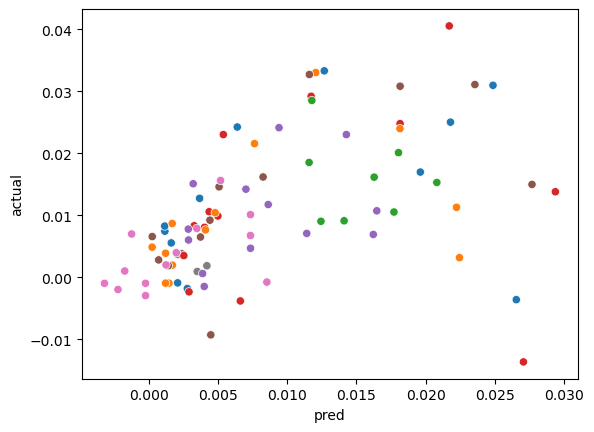

In [173]:
sns.scatterplot(data=forecast_merged, x="pred", y="actual", hue="country")
plt.legend().remove()

In [174]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"]), missing="drop"
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     25.40
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           2.51e-06
Time:                        13:50:56   Log-Likelihood:                 288.26
No. Observations:                  89   AIC:                            -572.5
Df Residuals:                      87   BIC:                            -567.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0049      0.001      3.376      0.001       0.002       0.008
pred           0.6334      0.126      5.040      0.000       0.384       0.883
==============================================================================
Omnibus:                        7.596   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.022   Jarque-Bera (JB):               12.541
Skew:                          -0.238   Prob(JB):                      0.00189
Kurtosis:                       4.776   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
tss

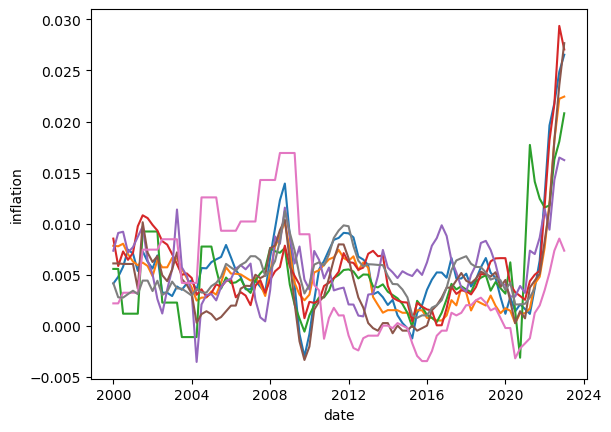

In [176]:
from seminartools.models.utils import make_oos_predictions

sns.lineplot(
    data = make_oos_predictions(lambda: model, df, tss),
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# ARMAX

In [177]:
from seminartools.models.armax_model import ARMAXModel
preds = make_oos_predictions(lambda: ARMAXModel(max_p = 2, max_q = 2), df, tss, progress = True, num_cores = 5)
preds

Splits: 100%|██████████| 5/5 [00:00<00:00, 852.29it/s]


,date,country,inflation
0,2004-10-01,Sweden,0.006102
1,2004-10-01,Denmark,0.007378
2,2004-10-01,United Kingdom,0.079921
3,2004-10-01,Netherlands,0.005533
4,2004-10-01,Norway,0.007599
...,...,...,...
551,2020-10-01,United Kingdom,0.008986
552,2023-01-01,Germany,0.001353
553,2023-01-01,Netherlands,-0.003124
554,2023-01-01,Norway,-0.012931


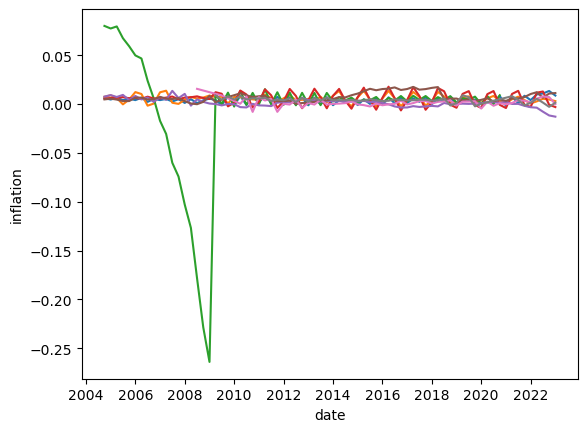

In [178]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# PCA VAR

In [163]:
from seminartools.models.pca_var_model import PCAVARModel
preds = make_oos_predictions(lambda: PCAVARModel(), df, tss, progress = True, num_cores = 1)
preds

ValueError: zero-size array to reduction operation maximum which has no identity

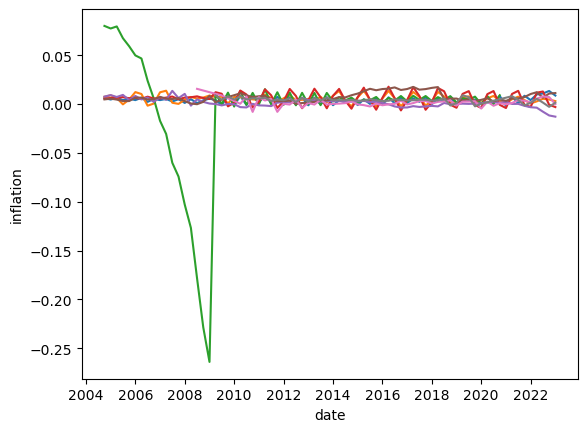

In [179]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# UCSVSS

In [180]:
from seminartools.models.uc_sv_ss_model import UCSVSSModel

preds = make_oos_predictions(
    lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
    df,
    tss,
    progress=True,
    num_cores=1,
)
preds

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x000001330FD80D10>)


Splits:  20%|██        | 1/5 [00:24<01:38, 24.66s/it]

Fitted!


Splits: 100%|██████████| 5/5 [00:25<00:00,  5.04s/it]


,inflation,country,date
0,0.000330,Switzerland,1999-07-01
1,0.002711,Sweden,1999-07-01
2,0.005543,Denmark,2000-01-01
3,0.008639,United Kingdom,2000-01-01
4,0.001592,Germany,1999-07-01
...,...,...,...
739,0.004205,United Kingdom,2020-10-01
740,0.018359,Germany,2023-01-01
741,0.016431,Netherlands,2023-01-01
742,0.011903,Norway,2023-01-01


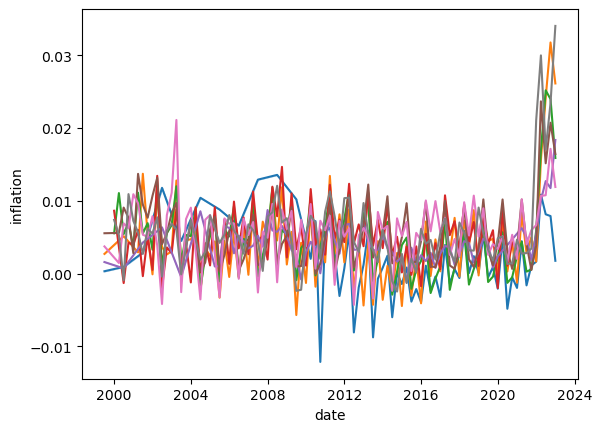

In [181]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# RE model

In [182]:
from seminartools.models.random_effects_model import RandomEffectsModel

preds = make_oos_predictions(
    lambda: RandomEffectsModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

Splits: 100%|██████████| 5/5 [00:00<00:00, 11.67it/s]


,date,country,inflation
0,2000-01-01,Belgium,0.004563
1,2000-01-01,Denmark,0.007922
2,2000-01-01,United Kingdom,0.003807
3,2000-04-01,Belgium,0.003660
4,2000-04-01,Denmark,0.007017
...,...,...,...
651,2023-01-01,Germany,0.004036
652,2023-01-01,Netherlands,0.005004
653,2023-01-01,Norway,0.003576
654,2023-01-01,Sweden,0.002090


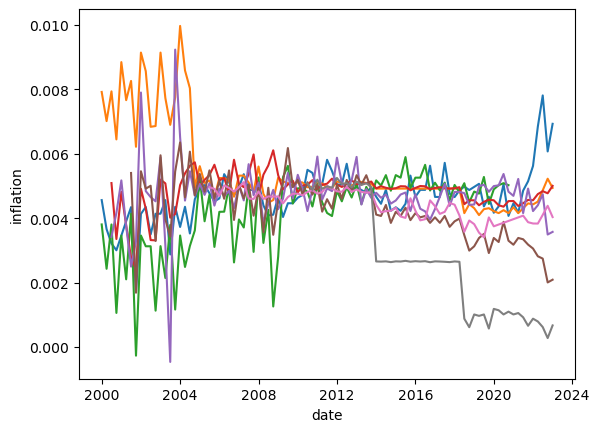

In [183]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# Distance based model

In [184]:
from seminartools.models.distance_model import DistanceModel

preds = make_oos_predictions(
    lambda: DistanceModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

Splits: 100%|██████████| 5/5 [00:00<?, ?it/s]


,country,inflation,date
0,Belgium,0.005455,2000-01-01
1,Denmark,0.008259,2000-01-01
2,United Kingdom,0.004876,2000-01-01
3,Belgium,0.003171,2000-04-01
4,Denmark,0.006602,2000-04-01
...,...,...,...
651,Germany,0.005327,2023-01-01
652,Netherlands,0.007224,2023-01-01
653,Norway,0.002393,2023-01-01
654,Sweden,0.000420,2023-01-01


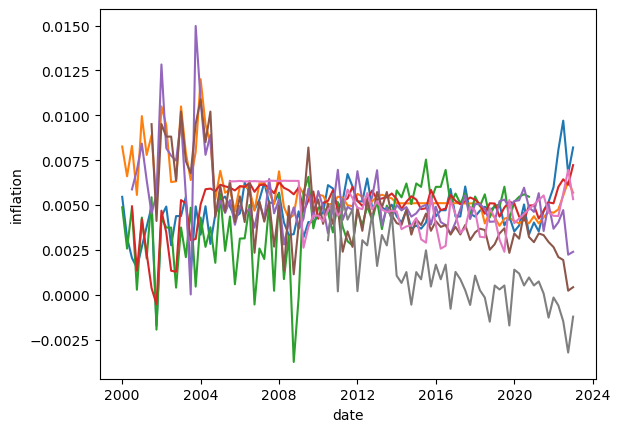

In [185]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [186]:
model = DistanceModel()
model.fit(df[df["date"] <= "2000-01-01"])
model

Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


In [ ]:
pd.Series(model.country_intercepts.mean(axis = 0), index= model.countries.tolist() + ["mean"]).sort_values()

United Kingdom   -0.820578
France           -0.548171
Belgium          -0.230832
Netherlands      -0.063331
Switzerland      -0.062865
Italy             0.032029
mean              0.112387
Germany           0.168159
Norway            0.735608
Sweden            0.898440
Denmark           1.015414
dtype: float64

<Axes: xlabel='date'>

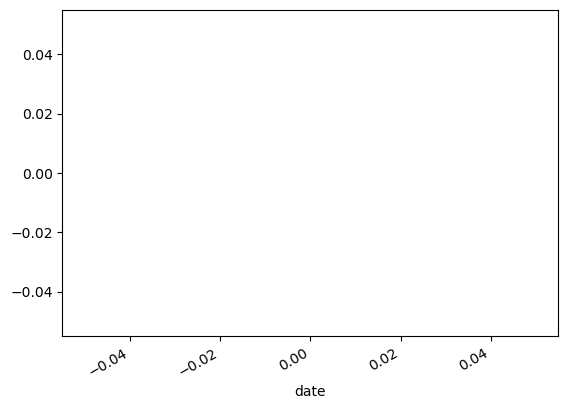

In [187]:
df.query("country == 'South Africa'").set_index("date")["inflation"].plot()

In [188]:
preds = h_period_ahead_forecast(model, df, "2000-01-01", h=1)
preds

,country,inflation,date
0,Belgium,0.005659,2000-01-01
1,Denmark,0.008066,2000-01-01
2,United Kingdom,0.004145,2000-01-01
3,Belgium,0.003833,2000-04-01
4,Denmark,0.006161,2000-04-01
...,...,...,...
651,Germany,0.001351,2023-01-01
652,Netherlands,-0.008771,2023-01-01
653,Norway,0.000532,2023-01-01
654,Sweden,-0.000983,2023-01-01


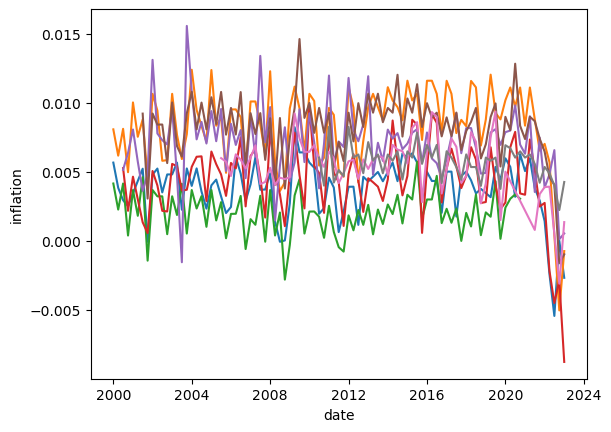

In [189]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [190]:
preds.query("inflation > 1")

,country,inflation,date


In [ ]:
model._create_lagged_variables(df.set_index("date")).query("country == 'Spain' and date == '2020-04-01'").T

date
index
country
inflation
gdp_growth
interest_rate
unemployment_rate
commodity_CRUDE_PETRO
commodity_iNATGAS
commodity_iAGRICULTURE
commodity_iMETMIN


In [191]:
import numpy as np
from scipy.stats import percentileofscore

feature_df = model._create_lagged_variables(df.set_index("date"))
# we calculate the quantiles for all float64 dtypes
cols = feature_df.select_dtypes("float64").columns
specific_feature_map = feature_df.query("country == 'Spain' and date == '2020-04-01'")

percentile_columns = pd.DataFrame(index=specific_feature_map.index)

# Calculating percentile ranks for each float column in 'specific_feature_map'.
for col in cols:
    # This will hold the percentile ranks for the current column.
    col_percentiles = []
    
    # Iterate through each row in 'specific_feature_map' to calculate the percentile rank of its value in 'feature_df'.
    for value in specific_feature_map[col]:
        percentile_rank = percentileofscore(feature_df[col].dropna(), value, kind='rank')
        col_percentiles.append(percentile_rank)
    
    # Assigning calculated percentile ranks to the new columns.
    percentile_columns[f'{col}'] = col_percentiles

percentile_columns["country"] = specific_feature_map["country"]

pd.concat([
    specific_feature_map,
    percentile_columns
], keys = ["feature_value", "percentile"]).T

index
country
inflation
gdp_growth
interest_rate
unemployment_rate
commodity_CRUDE_PETRO
commodity_iNATGAS
commodity_iAGRICULTURE
commodity_iMETMIN
commodity_iPRECIOUSMET


In [192]:
preds.query("country == 'Switzerland' and date == '2010-07-01'").T

,268
country,Switzerland
inflation,0.00602
date,2010-07-01 00:00:00


# Get scores

In [194]:
from seminartools.models.utils import get_stats
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.models.pca_var_model import PCAVARModel
from seminartools.models.armax_model import ARMAXModel
from seminartools.models.uc_sv_ss_model import UCSVSSModel
from seminartools.models.random_effects_model import RandomEffectsModel
from seminartools.models.distance_model import DistanceModel

exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]

stats = get_stats(
    [
        ("4qa", lambda: FourQuarterAverageModel()),
        #("pca_var", lambda: PCAVARModel()),
        ("ar", lambda: ARMAXModel(max_p=2, max_q=0)),
        (
            "arx",
            lambda: ARMAXModel(max_p=2, max_q=0, exogenous_columns=exog_columns),
        ),
        ("arma", lambda: ARMAXModel(max_p=2, max_q=2)),
        (
            "armax",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns=exog_columns),
        ),
        (
            "uc_sv",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=False),
        ),
        (
            "uc_sv_ss",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
        ),
        ("random_effects", lambda: RandomEffectsModel()),
        (
            "random_effects_x",
            lambda: RandomEffectsModel(exogenous_columns=exog_columns),
        ),
        ("distance", lambda: DistanceModel()),
        ("distance_x", lambda: DistanceModel(exogenous_columns=exog_columns)),
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)
stats

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x000001331B96F510>)


100%|██████████| 8/8 [00:00<00:00, 14.20it/s]


Fitted!
Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x000001331B962C50>)


100%|██████████| 8/8 [00:00<00:00, 20.35it/s]


Fitted!


,mse,mae,r2,mz_intercept,mz_slope,mz_r2
uc_sv_ss,0.000036,0.004093,0.206165,0.001578,0.698027,0.254132
4qa,0.000039,0.004571,0.120000,0.001826,0.652613,0.168189
uc_sv,0.000044,0.004818,0.018089,0.002439,0.538441,0.076637
random_effects,0.000046,0.004904,-0.019544,0.003708,0.255824,0.002282
distance,0.000048,0.005078,-0.066457,0.004171,0.151590,0.002136
ar,0.000050,0.005020,-0.040767,0.003366,0.353089,0.015063
random_effects_x,0.000051,0.005113,-0.131181,0.004315,0.149242,0.003200
distance_x,0.000069,0.006120,-0.530544,0.005024,-0.058260,0.001301
arx,0.000260,0.010380,-4.391888,0.005023,-0.023787,0.002362
arma,0.000482,0.008233,-9.013600,0.004875,0.017415,0.002810


In [127]:
# TODO:
# (in order of priority)
# 1. Loss fn per country (especially RE vs distance)
# 2. make global system of UCSVSSs: multivariate UCSVSS on a cross-country basis.
#    Incorporate distance based structure here? Might even have academic relevance
#    (this would connect the entire paper!)
# 3. interpret coefficients, figure out why distance < RE model
#    more specifically: NL (surrounded by other countries) and Turkey (weird inflation issues)
# ----------
# 4. distribution eval
# 5. (include X with UCSVSS, but likely sucks)

In [128]:
stats

,mse,mae,r2,mz_intercept,mz_slope,mz_r2
uc_sv_ss,0.000035,0.003879,0.187072,0.001795,0.667974,0.250762
4qa,0.000037,0.004383,0.139453,0.001716,0.676252,0.182031
uc_sv,0.000043,0.004664,0.016577,0.002450,0.533506,0.082173
random_effects,0.000044,0.004737,-0.006458,0.002940,0.411364,0.004787
distance,0.000045,0.004853,-0.031005,0.003316,0.332618,0.009565
random_effects_x,0.000046,0.004816,-0.071456,0.003731,0.266487,0.008981
ar,0.000047,0.004853,-0.008691,0.002689,0.474646,0.028095
pca_var,0.000053,0.005208,-0.241460,0.004063,0.222178,0.019070
distance_x,0.000062,0.005744,-0.434383,0.004776,0.013147,0.000068
arx,0.000317,0.010415,-5.819341,0.004892,-0.014129,0.001129


In [91]:
#generate latex code for the stats table
stats.to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n & mse & mae & r2 & mz_intercept & mz_slope & mz_r2 \\\\\n\\midrule\nuc_sv_ss & 0.000041 & 0.004366 & 0.257634 & 0.001212 & 0.779802 & 0.280400 \\\\\n4qa & 0.000049 & 0.005101 & 0.100289 & 0.001870 & 0.649716 & 0.142197 \\\\\nar & 0.000054 & 0.005241 & 0.105358 & 0.001211 & 0.755545 & 0.117711 \\\\\nuc_sv & 0.000055 & 0.005383 & -0.001481 & 0.002566 & 0.497228 & 0.052402 \\\\\npca_var & 0.000057 & 0.005449 & -0.048696 & 0.003160 & 0.469044 & 0.100827 \\\\\nrandom_effects & 0.000069 & 0.005898 & -0.242479 & 0.009074 & -0.817990 & 0.061503 \\\\\ndistance & 0.000073 & 0.006072 & -0.321562 & 0.007585 & -0.531740 & 0.044061 \\\\\nrandom_effects_x & 0.000078 & 0.006258 & -0.418297 & 0.006249 & -0.322265 & 0.025485 \\\\\ndistance_x & 0.000099 & 0.007191 & -0.790184 & 0.005582 & -0.186032 & 0.018871 \\\\\narma & 0.000308 & 0.007304 & -4.135983 & 0.004561 & 0.061892 & 0.018056 \\\\\narx & 0.000378 & 0.010816 & -5.309900 & 0.004721 & 0.018834 & 0.001955 \\\